# Numpy - arrays, matrices, linear algebra


Last week we were working with containers:

- lists
- dicts  
- zip
- collections.Counter

---

This week we will be working with [NumPy](https://numpy.org/).

NumPy is a library for the Python, adding:  
- support for large, multi-dimensional arrays and matrices
- along with a large collection of high-level mathematical functions to operate on these arrays.

Using NumPy in Python gives functionality comparable to MATLAB.
They both allow the user to write fast programs as long as most operations work on arrays or matrices instead of scalars. 

Complementary Python packages are available: 

- [SciPy](https://www.scipy.org/) is a library that adds more MATLAB-like functionality
- [Matplotlib](https://matplotlib.org/) is a plotting package that provides MATLAB-like plotting functionality.

Internally, both MATLAB and NumPy rely on BLAS and LAPACK for efficient linear algebra computations.

---

In this notebook we 

- review the basic constructions below


In [1]:
import numpy as np

In [2]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
type(_)

numpy.ndarray


[np.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

An array object represents a multidimensional, homogeneous array of fixed-size items. 
An associated data-type object describes the format of each element in the array (its byte-order, how many bytes it occupies in memory, whether it is 
- an integer
- a floating point number
- or something else (complex)

Arrays can be constructed using 

- np.array
- np.zeros/np.ones
- np.arange


In [6]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [7]:
_.shape

(2, 2)

In [8]:
np.arange(10).shape

(10,)

In [10]:
np.ones(6,dtype=np.int32)

array([1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
np.ones((2,3),dtype=np.int32)

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [12]:
?np.ones

Signature: np.ones(shape, dtype=None, order='C')
Docstring:
Return a new array of given shape and type, filled with ones.

Parameters
----------
shape : int or sequence of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: C
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.

Returns
-------
out : ndarray
    Array of ones with the given shape, dtype, and order.

See Also
--------
ones_like : Return an array of ones with shape and type of input.
empty : Return a new uninitialized array.
zeros : Return a new array setting values to zero.
full : Return a new array of given shape filled with value.


Examples
--------
>>> np.ones(5)
array([1., 1., 1., 1., 1.])

>>> np.ones((5,), dtype=int)
array([1, 1, 1, 1, 1])

>>> np.ones((2, 1))
array([[1.],
    

# Reshaping

Take an array and change its dimension


In [20]:
M = np.arange(12); M

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [22]:
M.reshape((3,4)), M # make a 2d array

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [37]:
N = M.reshape((3,4)); N # a 2d array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
N.reshape(12) #back to M

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [62]:
N.transpose() 

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [63]:
np.arange(5).transpose() # doesn't work

array([0, 1, 2, 3, 4])

In [65]:
np.arange(5).reshape((5,1)) #col vector

array([[0],
       [1],
       [2],
       [3],
       [4]])

# Slices and indexing

this can be complicated

- [:] is a slice as before but it's behavior depends on the **shape**
- [i,j] will give the *ij* th element of a 2d array (matrix)
- [:,:] is a 2d slice (block ina matrix)

[Learn more](https://www.pythoninformer.com/python-libraries/numpy/index-and-slice/)


In [35]:
np.arange(20)[3:-3] # one dimensional so works as with a list

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [59]:
N # but this is a 2d array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
N[:2] #first 2 rows

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [44]:
N[0,0], N[0,1], N[1,0], N[-1,-1] # some elements

(0, 1, 4, 11)

In [46]:
N[:, 1:3] #2nd and 3rd columns

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [49]:
N[1,:] #2nd row

array([4, 5, 6, 7])

In [61]:
N[:,1] #2nd col

array([1, 5, 9])

In [52]:
N[:2,:2] #2x2 block

array([[0, 1],
       [4, 5]])

In [58]:
N[1:,2:] #2x2 block

array([[ 6,  7],
       [10, 11]])

## Block assignment

In [130]:
A = np.zeros((4,4))
A

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [135]:
A[:2, :2] = 1
A[2:, 2:] = 3
A[:2, 2:] = 2
A

array([[1., 1., 2., 2.],
       [1., 1., 2., 2.],
       [0., 0., 3., 3.],
       [0., 0., 3., 3.]])

## Copying values

In [136]:
B = np.ones_like(A)
B

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [138]:
B[1:,1:] = A[1:,1:]
B

array([[1., 1., 1., 1.],
       [1., 1., 2., 2.],
       [1., 0., 3., 3.],
       [1., 0., 3., 3.]])

## Row/column operations

In [139]:
A[1] = A[1] + A[2] #add rows
A

array([[1., 1., 2., 2.],
       [1., 1., 5., 5.],
       [0., 0., 3., 3.],
       [0., 0., 3., 3.]])

In [142]:
A[:,0] *= 2 #multiply column by scalar
A

array([[4., 1., 2., 2.],
       [4., 1., 5., 5.],
       [0., 0., 3., 3.],
       [0., 0., 3., 3.]])

# Arithemetic in general

In [66]:
N

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [68]:
2*N # scalar multiplication

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [78]:
np.ones_like(N) 

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [77]:
N + np.ones_like(N) #addition

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## A trick

This uses an advanced trick called 
[broadcasting](https://numpy.org/doc/stable/reference/generated/numpy.broadcast.html)
to do the same thing.

Basically the 1 is automatically converted to ```np.ones_like(N)```

In [79]:
N + 1

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## More addition

In [76]:
N[:,:-1] + np.identity(3) 

array([[ 1.,  1.,  2.],
       [ 4.,  6.,  6.],
       [ 8.,  9., 11.]])

## Multiplication, applying functions

- (*) is element by element
- f() is element by element

In [83]:
N

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [82]:
N*N

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [85]:
np.sqrt(N*N)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [87]:
np.sqrt(np.arange(10))

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [5]:
def f(x):
    return np.log(2*x + 1)

In [127]:
f(np.arange(10))

array([0.        , 1.09861229, 1.60943791, 1.94591015, 2.19722458,
       2.39789527, 2.56494936, 2.7080502 , 2.83321334, 2.94443898])

# Speed comparison

https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-timeit

In [151]:
%%timeit
f(np.arange(1000))

129 µs ± 1.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [152]:
%%timeit
[f(x) for x in np.arange(1000)]

24.9 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [149]:
g = np.vectorize(f)

In [150]:
%%timeit
g(np.arange(1000))

17 ms ± 581 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Scalar product

In [143]:
v = np.arange(5)
v

array([0, 1, 2, 3, 4])

In [144]:
np.dot(v,v)

30

In [146]:
np.linalg.norm(v) ** 2

30.0

In [147]:
np.dot(v, np.ones_like(v))

10

In [148]:
np.sum(v)

10

## Matrix x vector, Matrix x Matrix

In [155]:
R = np.ones((2,2))
R[0,1] *= -1
R

array([[ 1., -1.],
       [ 1.,  1.]])

In [160]:
np.dot(R, np.array([1,0])), np.dot(R, np.array([0,1])) 

(array([1., 1.]), array([-1.,  1.]))

In [161]:
np.dot(R, R)

array([[ 0., -2.],
       [ 2.,  0.]])

## Graphs

we'll use [matplotlib](https://matplotlib.org/)
to draw some graphs.

Matplotlib can be **very** complicated 
so we'll study it properly next week.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

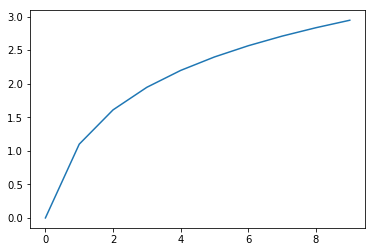

In [6]:
plt.plot(f(np.arange(10)) )

In [8]:
T = np.linspace(0, 2*np.pi, 20)


In [7]:
? np.linspace

Signature: np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is False.
num : int, optional
    Number of samples to generate. Default is 50. Must be non-negative.
endpoint : bool, optional
    If True, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
retstep : bool, optional
    If True, ret

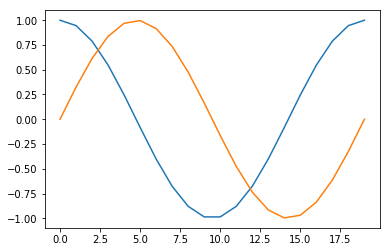

In [172]:
Y = np.sin(T)
X = np.cos(T)
plt.plot(X)
plt.plot(Y)

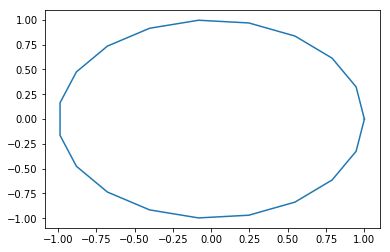

In [173]:
plt.plot(X,Y)

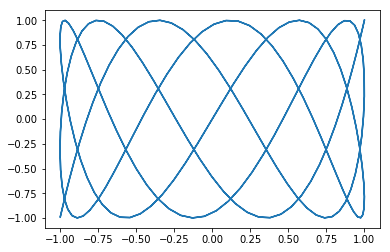

In [13]:
S = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(5*S), np.cos(13*S))

## Basic linear algebra

In [18]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [20]:
vps, basis = np.linalg.eig(A)

In [21]:
vps

array([ 1.33484692e+01, -1.34846923e+00, -2.48477279e-16])

In [22]:
np.linalg.det(A)

0.0

In [23]:
vps[2]

-2.484772788451793e-16

In [24]:
basis 

array([[ 0.16476382,  0.79969966,  0.40824829],
       [ 0.50577448,  0.10420579, -0.81649658],
       [ 0.84678513, -0.59128809,  0.40824829]])

In [25]:
np.dot(A, basis)

array([[ 2.19934474e+00, -1.07837039e+00, -3.33066907e-16],
       [ 6.75131503e+00, -1.40518298e-01, -8.88178420e-16],
       [ 1.13032853e+01,  7.97333791e-01, -1.33226763e-15]])

In [26]:
np.dot(A, basis[:,2])

array([-3.33066907e-16, -4.44089210e-16, -8.88178420e-16])

In [27]:
basis[:,2]/basis[0,2]

array([ 1., -2.,  1.])

In [28]:
A[0] - 2* A[1]  + A[2]

array([0, 0, 0])

## Calculate the eigenvalues

from the characteristic polynomial

$$t \times(t^2 -12t -18)$$

In [32]:
np.poly(A).astype(np.int32)

array([  1, -12, -18,   0], dtype=int32)

### Use the quadratic formula

In [45]:
disc = np.sqrt(12**2 + 4*18)
disc, 6*np.sqrt(6)

(14.696938456699069, 14.696938456699067)

In [37]:
(12 + disc )/2, (12 - disc )/2

(13.348469228349535, -1.3484692283495345)

6.0